In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('../data/Portfolio_by_Location_by_Debt_Size.csv')

In [2]:
states = []
for id, i in enumerate(df['Unnamed: 0']):
    if id == 0: continue
    states.append(i.upper())

In [3]:
amount_lent = {}
borrowers = {}
avg = {}

for i in df.columns:
    if i[0] == 'U': continue
    else:
        amount_lent[i] = []
        borrowers[i] = []
        avg[i] = []

slabs = list(borrowers.keys())

for i in range(1, 55):
    for id, j in enumerate(df.loc[i, :]):
        if id < 1: continue
        else:
            if (id % 2 == 0): borrowers[slabs[(id // 2) - 1]].append(float(j))
            else: amount_lent[slabs[(id - 1) // 2]].append(float(j[1:]))

for i in slabs:
    for id, j in enumerate(amount_lent[i]):
        avg[i].append(amount_lent[i][id] * 1000 / borrowers[i][id])

avg_df = pd.DataFrame(avg, index=states)
amount_lent_df = pd.DataFrame(amount_lent, index=states)
borrowers_df = pd.DataFrame(borrowers, index=states)

In [4]:
pie_charts_borrowers = []

for id in borrowers_df.index:
    if id == "CALIFORNIA" or id == "TEXAS":
        temp = []
        temp.append(id)
        for i in borrowers_df.loc[id, :]:
            temp.append(i)
        pie_charts_borrowers.append(temp)


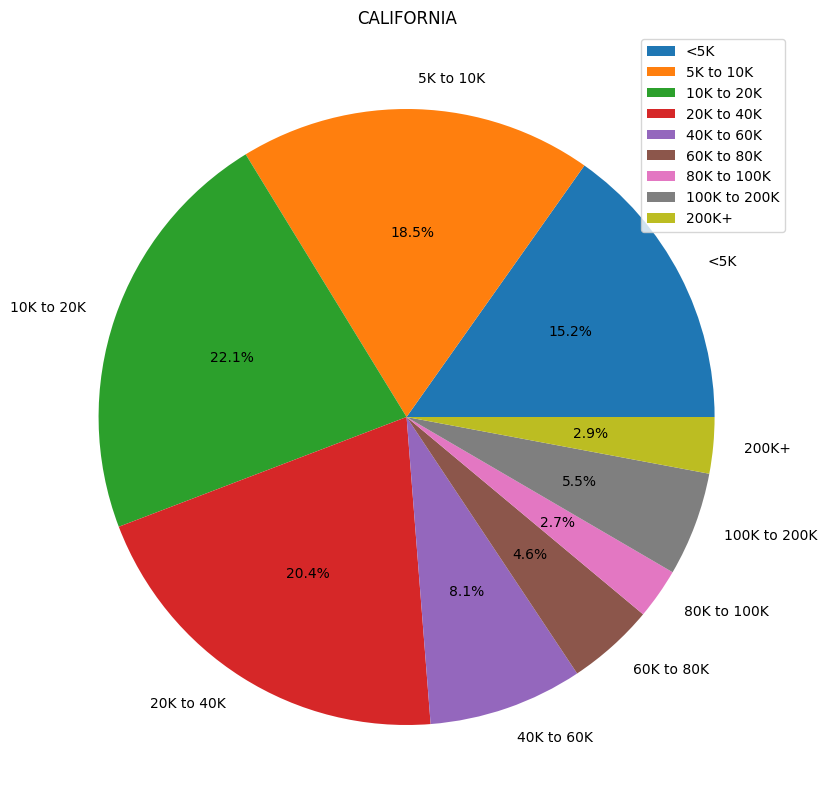

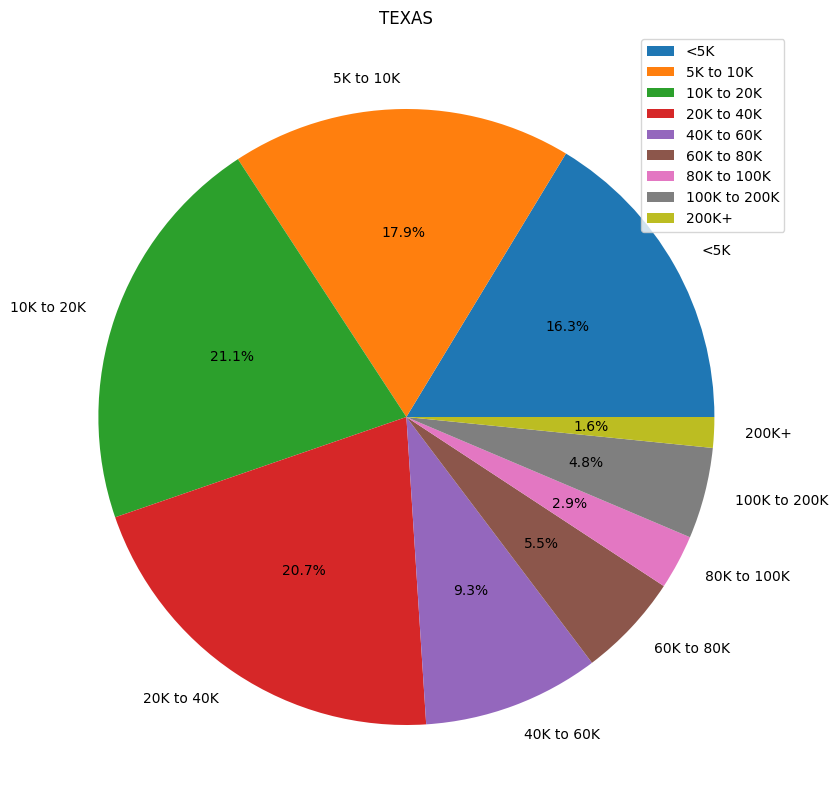

In [6]:
for i in range(len(pie_charts_borrowers)):
    plt.figure(figsize=(15, 10))
    plt.title(pie_charts_borrowers[i][0])
    plt.pie(pie_charts_borrowers[i][1:], labels=slabs, autopct='%1.1f%%')
    plt.legend(loc="upper right")
    plt.show()
